<a href="https://colab.research.google.com/github/grogusbeskar/DTS-PRO-Final-Project/blob/main/MNIST_CF_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi SVM Terhadap Dataset MNIST**

`# Dataset diambil sejumlah 10000 sampel dari total 60000 data`

`# Sumber dataset`
https://www.kaggle.com/oddrationale/mnist-in-csv

`# Sumber kode `
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py




# **Import Modul**

In [62]:
import sklearn
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **CSV file ---> DataFrame**

In [63]:
url = 'https://raw.githubusercontent.com/grogusbeskar/DTS-PRO-Final-Project/main/mnist_test.csv'
mnist_test_df = pd.read_csv(url)

# **Melihat Distribusi Untuk Setiap Label**

```
Terdapat kecenderungan ke arah label 1, namun jika menggunakan seluruh dataset MNIST sekalipun tetap demikian, jadi boleh diabaikan
```

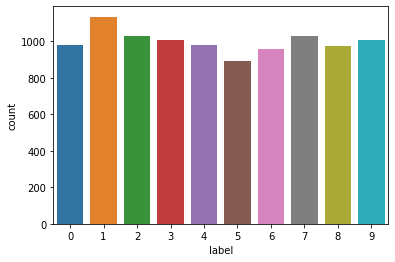

In [64]:
sns.countplot(mnist_test_df['label'])
plt.show()

# **Slicing Dataframe Untuk Training & Testing**

```
.iloc untuk slicing berbasis integer location & .values untuk mengambil nilai dataframe tanpa mengambil nilai axenya
```

In [46]:
datag=mnist_test_df.iloc[:,1:].values
labelg=mnist_test_df.iloc[:,0].values
print(datag)
print(labelg)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[7 2 1 ... 4 5 6]


# **Scaling Nilai Feature Dalam Interval (0~1)**

```
#Dilakukan pembagian terhadap 255 karena dataset ini berisi nilai dari masing-masing pixel dengan nilai 0-255 (hitam-putih)
```

In [47]:
data_train=datag/255

# **Partisi Dataframe Menjadi Training Set & Testing Set**


```
# Pembagian data training & testing dengan proporsi 80% (8000) training dan 20% testing (2000)
```



In [48]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(datag, labelg, test_size=0.2)

# **Pemilihan Kernel SVM**


```
# Untuk kernel non-linear biasa digunakan radial-basis-function (rbf) atau polynomial (poly)
```



In [51]:
clf = svm.SVC(kernel="poly")

# **Fitting Model**

In [53]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Kalkulasi Prediksi Kelas & Akurasi Klasifikasi**


```
# Akurasi klasifikasi diperoleh ~96%
```



In [54]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9615


# **Plotting Classification Report**

In [57]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       217
           1       0.93      1.00      0.96       219
           2       0.96      0.94      0.95       217
           3       0.95      0.95      0.95       202
           4       0.95      0.99      0.97       180
           5       0.97      0.95      0.96       198
           6       0.98      0.96      0.97       188
           7       0.97      0.93      0.95       212
           8       0.96      0.97      0.97       168
           9       0.97      0.95      0.96       199

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighte

# **Plotting Confusion Matrix** 

Confusion matrix:
[[213   0   0   0   0   1   2   0   1   0]
 [  0 218   0   0   0   0   1   0   0   0]
 [  2   1 204   4   2   0   0   1   2   1]
 [  0   3   2 191   0   4   0   1   1   0]
 [  0   0   1   0 178   0   0   0   0   1]
 [  0   5   0   3   0 188   0   0   2   0]
 [  2   2   0   0   3   0 181   0   0   0]
 [  1   3   4   2   1   0   0 197   0   4]
 [  0   2   1   0   0   0   0   2 163   0]
 [  1   0   0   2   4   0   0   2   0 190]]


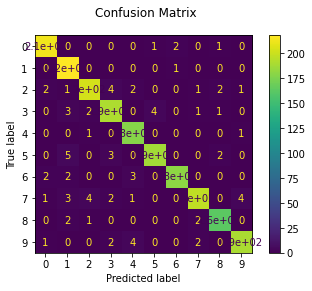

In [58]:
disp = metrics.plot_confusion_matrix(clf, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()